[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

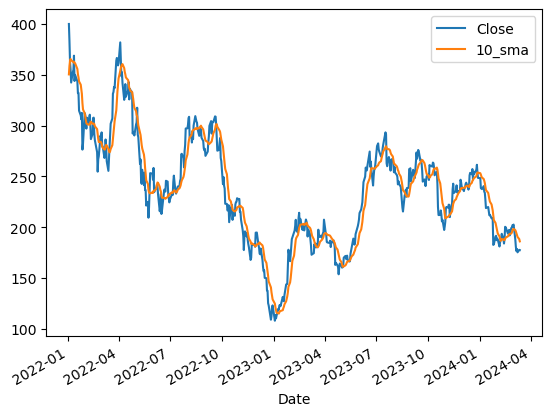

In [1]:
import pandas as pd
import yfinance as yf

df = yf.download('TSLA') # Download the TSLA data using yahoo finance
df['10_sma'] = df['Close'].rolling(10).mean() # The 10 simple moving average
df = df[df.index > '2022-01-01'] # Filter to this year's data only
df.plot(y=['Close', '10_sma']) # Plot the closing prices

In [2]:
import yfinance as yf

tsla = yf.Ticker('TSLA')
print(tsla.get_balance_sheet())

                                               2023-12-31     2022-12-31  \
TreasurySharesNumber                                  0.0            NaN   
OrdinarySharesNumber                         3185000000.0   3164000000.0   
ShareIssued                                  3185000000.0   3164000000.0   
TotalDebt                                    9573000000.0   5748000000.0   
TangibleBookValue                           62019000000.0  44111000000.0   
...                                                   ...            ...   
CashCashEquivalentsAndShortTermInvestments  29094000000.0  22185000000.0   
OtherShortTermInvestments                   12696000000.0   5932000000.0   
CashAndCashEquivalents                      16398000000.0  16253000000.0   
CashEquivalents                               495000000.0   2288000000.0   
CashFinancial                               15903000000.0  13965000000.0   

                                               2021-12-31     2020-12-31  
TreasuryShar

In [3]:
import pandas as pd

df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [4]:
s_and_p_stocks = df['Symbol'].tolist()

[*********************100%%**********************]  1 of 1 completed


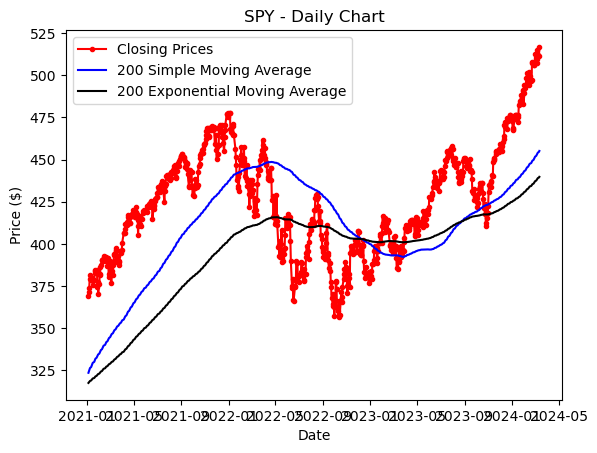

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download the data, calculate the MAs and filter to 2021 onwards
df = yf.download('SPY')
df['200_sma'] = df['Close'].rolling(200).mean()
df['200_ema'] = df['Close'].ewm(200).mean()
df = df[df.index >= '2021-01-01']

# Create the plot
plt.plot(df.index, df['Close'], 'r.-')
plt.plot(df.index, df['200_sma'], 'b-')
plt.plot(df.index, df['200_ema'], 'k-')

# Legend, labels and title
plt.legend([
    'Closing Prices', 
    '200 Simple Moving Average', 
    '200 Exponential Moving Average',
])
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('SPY - Daily Chart')

plt.show()

In [1]:
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default='svg'

df = yf.download('SPY')
df['ma'] = df['Close'].rolling(10).mean()
df['upper_bb'] = df['ma'] + 2*df['Close'].rolling(10).std()
df['lower_bb'] = df['ma'] - 2*df['Close'].rolling(10).std()

df = df[df.index >= '2022-01-01']

fig = go.Figure()

fig.add_trace(
    go.Candlestick(
        x = df.index,
        open = df['Open'],
        low = df['Low'],
        high = df['High'],
        close = df['Close'],
        showlegend = False,
    )    
)

fig.add_trace(
    go.Line(
        x = df.index, 
        y = df['ma'],
        showlegend = False,
        line = {'color': 'rgba(118, 167, 219, 0.8)'},
    )    
)

fig.add_trace(
    go.Line(
        x = df.index, 
        y = df['upper_bb'],
        showlegend = False,
        line = {'color': 'rgba(118, 167, 219, 0.8)'},
    )    
)

fig.add_trace(
    go.Line(
        x = df.index, 
        y = df['lower_bb'],
        fill = 'tonexty',
        showlegend = False,
        line = {'color': 'rgba(118, 167, 219, 0.8)'},
        fillcolor = 'rgba(118, 167, 219, 0.3)',
    )    
)

fig.update_xaxes(
    rangebreaks = [{'bounds': ['sat', 'mon']}],
    rangeslider_visible = False,
)

fig.update_layout(
    yaxis = {'title': 'Price'},
    xaxis = {'title': 'Date'},
    margin = {'l': 50, 'r': 50, 'b': 50, 't': 25},
)

fig.show()

[*********************100%%**********************]  1 of 1 completed
c:\Users\akarpinska2\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [1]:
import numpy as np
import yfinance as yf


def run_strat(open_prices, ma):
    '''
    Run simple ma strategy - we buy if the stock is above the moving average
    and close our position once the stock crosses below it.
    '''
    
    # Flag to determine whether the instrument is currently held or not
    holding = False
    
    # Empty lists to store the results from the strategy
    trade_res = []
    
    for day in range(1, open_prices.shape[0]):
        
        if not holding and open_prices[day] >= ma[day-1]:
            
            bought_at = open_prices[day]
            holding = True
        
        elif holding and open_prices[day] < ma[day-1]:
            
            trade_res.append(open_prices[day]/bought_at - 1)
            holding = False
            
    # If we are still holding, then complete the trade to gather the full 
    # strategy performance until today
    if holding:
        trade_res.append(open_prices[day]/bought_at - 1)

    return np.array(trade_res)


if __name__ == '__main__':

    df = yf.download('SPY')
    df['ma'] = df['Close'].rolling(200).mean()
    df = df[df.index >= '2000-01-01'].dropna()
    
    trade_res = run_strat(df['Open'].values, df['ma'].values)
    
    print('Strategy Growth:', np.prod(1+trade_res))
    print('Buy and hold growth:', df['Close'].values[-1]/df['Close'].values[0])

[*********************100%%**********************]  1 of 1 completed

Strategy Growth: 2.8411742444287333
Buy and hold growth: 3.5532791013107006
